# Анализ гипотез для увеличения выручки крупного интернет-магазина.

**Цель исследования:**  Проанализировать список гипотез для увеличения выручки крупного интернет-магазина, подготовленный вместе с отделом маркетинга .

**Ход исследования**
1. Приоритизировать гипотезы
2. Запустить A/B-тест
3. Проанализировать результаты.

In [1]:
# Загружаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

In [2]:
# Загружаем данные из файла в датафрейм. Указываем два пути, как открыть файл: в локальном юпитере и в тренажёре
try:
    hypothesis = pd.read_csv('/Users/User/Downloads/hypothesis.csv')
    #orders = pd.read_csv('/Users/User/Downloads/orders.csv')
    #visitors = pd.read_csv('/Users/User/Downloads/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    #orders = pd.read_csv('/datasets/orders.csv')
    #visitors = pd.read_csv('/datasets/visitors.csv')

### Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# Примените фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


Наиболее перспективные гипотезы по ICE: под номерами 8, 0, 7

2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

In [5]:
# Примените фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


Наиболее перспективные гипотезы по RICE: под номерами 7, 2, 0

**Вывод:** Видим, что гипотезы под индексами 7 и 0 самые перспективные и по сособобу приоритизауии ICE и RICE. Однако гипотеза 7 с названием "Добавить форму подписки на все основные страницы" самая перспективная по RICE, потому что ее параметр Reach равен 10, в то время как у других гипотез меньше. Важно учитывать, сколько пользователей затронет гипотеза.

### Анализ A/B-теста

После проведения A/B-теста получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv

In [6]:
# Прочтём данные из файлов с результатами A/B-тестирования: 
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
# Проверяем явные дубликаты в visitors.
visitors.duplicated().sum()

0

In [8]:
# Проверяем явные дубликаты в orders.
orders.duplicated().sum()

0

In [9]:
# Проверяем количество пропусков в visitors.
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

In [10]:
# Проверяем количество пропусков в orders.
orders.isna().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Дубликаты и пропуски в данных отсутствуют. Предобработка не нужна.

In [11]:
# Проверим, сколько пользователей попали одновременно в обе группы 
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

In [12]:
# Создаем список пользователей с уникальными visitorId:
double_users = orders.groupby('visitorId').agg({'group' : 'nunique'}).reset_index().query('group > 1')['visitorId'].unique()

In [13]:
# Удаляем этих пользователей из таблицы orders:
orders = orders.query('visitorId not in @double_users')

In [14]:
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    0
dtype: int64

В таблице orders 58 пользователей оказалось одновременно в двух группах. Поэтому мы их удаляем из данных, чтобы расчеты были более точными.

In [15]:
# Чтобы построить графики, нужно собрать кумулятивные данные.
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}),
    axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

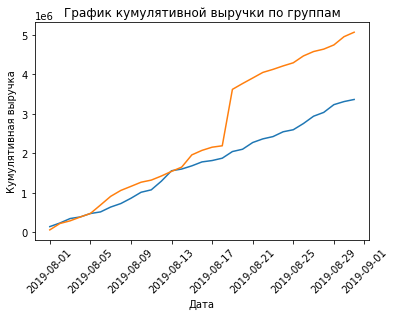

In [16]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation = 45)
plt.xlabel("Дата")
plt.ylabel("Кумулятивная выручка")
plt.show()

**Вывод:** Видим, что выручка обеих групп увеличивается на протяжении всего теста. Но происходит резкий скачок выручки группы В. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

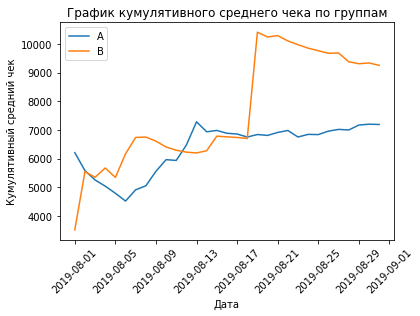

In [17]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation = 45)
plt.xlabel("Дата")
plt.ylabel("Кумулятивный средний чек")
plt.legend()
plt.show()

**Вывод:** Средний чек по группам различается. В группе А средний чек установился ближе к концу теста, а в группу B произошел резкий скачок. Возможно, в группу B теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне или почистить данные от аномальных заказов.

3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

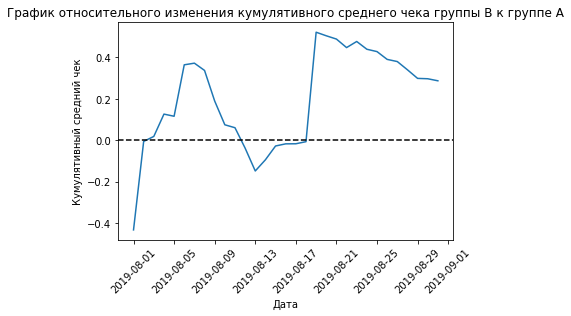

In [18]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation = 45)
plt.xlabel("Дата")
plt.ylabel("Кумулятивный средний чек")
plt.show()

**Вывод:** В нескольких точках график различия между сегментами резко «скачет». Скорее всего, это связано с крупными заказами и выбросами.

4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

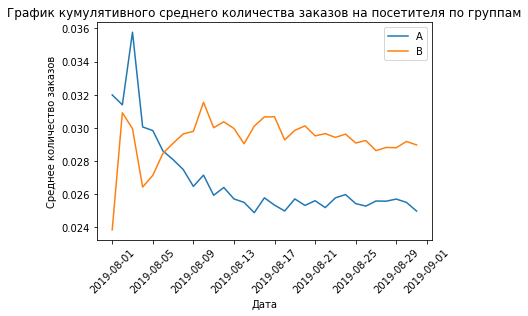

In [19]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation = 45)
plt.xlabel("Дата")
plt.ylabel("Среднее количество заказов")
plt.legend()
plt.show()


**Вывод:** Вначале в обеих группах происходит резкий скачок заказов, затем спад. И количество заказов в группе А постоянно уменьшается на протяжении эксперимента, а вот конверсия в группе В выросла и к середине теста конверсия стабилизировались

5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

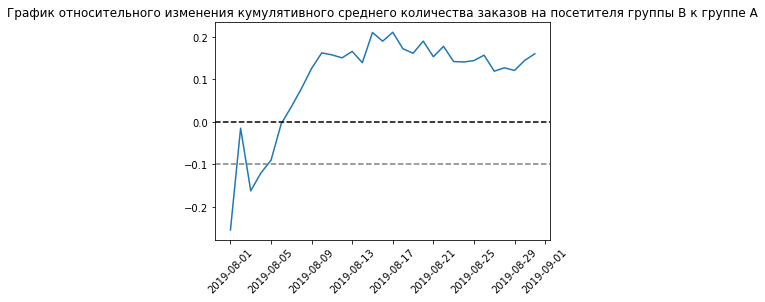

In [20]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         )

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xticks(rotation = 45)
plt.show()

**Вывод:** В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. Потом её конверсия относительно равномерна, небольшие скачки и колебания.

6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [21]:
# Создаем таблицу количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers.head()

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


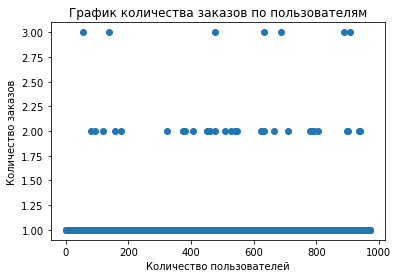

In [22]:
# Строим точечный график количества заказов по пользователям.
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel("Количество пользователей")
plt.ylabel("Количество заказов")
plt.show()

**Вывод:** В основном пользователи совершали один или два заказа. Пользователей, которые делали 3 или более заказов мало

7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

**Вывод:** Всего лишь 5% пользователей совершали более 1 заказов, а 2 заказа - всего лишь 1% пользователей. Поэтому разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять пользователей, совершивших более 2х заказов. 

8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

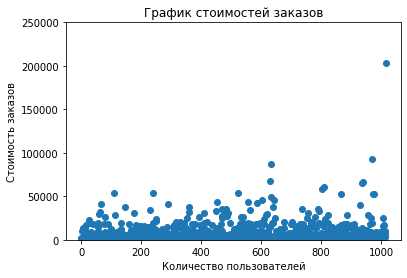

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel("Количество пользователей")
plt.ylabel("Стоимость заказов")
plt.ylim([0,250000])
plt.show()

**Вывод:** Основные заказы до 100 000. Есть выбросы в районе 200 000.

9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [25]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

**Вывод:** Не более, чем у 5% заказов чек дороже 26785, а свыше 53904 - всего лишь 1% заказа.

За границу аномалий берем больше 2 заказов на сумму больше 26785.

10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

**Сформулируем гипотезы.** Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Уровень статистической значимости(alpha) равен 0,05. Если р-value меньше 0,05, то нулевую гипотезу отвергаем, если больше, то нет. 

Применим статистический критерий Манна-Уитни к полученным выборкам. Метод, который будем применять для A/B-тестирования, называется st.mannwhitneyu(). Вероятности получения разных значений критерия Манна-Уитни рассчитаны теоретически, что даёт возможность делать вывод о различии или его отсутствии для любого заданного уровня значимости.

In [26]:
# Подготовим данные и создадим объединенную таблицу
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [27]:
# Создадим переменные ordersByUsersA и ordersByUsersB.
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [28]:
# Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.
# Тем, кто ничего не заказал, будут соответствовать нули.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост: 0.160


**Вывод:** P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 16%.

11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

**Сформулируем гипотезы.** Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

In [29]:
# Выведим p-value для сравнения средних чеков между группами. Округлим p-value до трёх знаков после запятой.
# Выведим относительный прирост среднего чека группы B, округлив до трёх знаков после запятой.
print("p-value:"'{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Относительный прирост:"'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value:0.829
Относительный прирост:0.287


**Вывод:** По "сырым" данным p-value составляет 0.829, т.е. больше 0.05. Нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Средний чек группы В выше среднего чека группы А на 28.7%.

12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

In [30]:
# Узнаем сколько всего аномальных пользователей.
# Найдем пользователей, совершивших более 2-заказов и суммой заказа больше 28000
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Аномальных пользователей:', abnormalUsers.count())

Аномальных пользователей: 58


In [31]:
# Подготовим выборки количества заказов по пользователям по группам теста:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [32]:
# Применим статистический критерий Манна-Уитни к полученным выборкам:
print("p-value", '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Относительный прирост:", '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value 0.012
Относительный прирост: 0.182


**Вывод:** Как и в случае с сырыми данными P-value меньше 0.05, поэтому нулевую гипотезу отвергаем. В среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 18.2%. Сегмент В значительно лучше сегмента А. 

13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [33]:
print("p-value:",
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.646
Относительный прирост: -0.048


**Вывод:** По "очищенным" данным p-value составляет 0.646, т.е. больше 0.05. Нулевую гипотезу не отвергаем, статистически значимых отличий в среднем чеке между группами нет. Но при этом Средний чек группы В стал меньше среднего чека группы А. Хотя общие выводы по результатам теста не сильно изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста.

14. Примите решение по результатам теста и объясните его. Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

 По результатам анализа теста видим, что выручка обеих групп увеличивается на протяжении всего теста. Но происходит резкий скачок выручки группы В. Средний чек по группам различается. В группе А средний чек установился ближе к концу теста, а в группе B произошел резкий скачок. Количество заказов в группе А постоянно уменьшается на протяжении эксперимента, а вот конверсия в группе В выросла. В начале теста группа B немного проигрывала группе A, затем вырвалась вперёд. Потом её конверсия относительно равномерна, небольшие скачки и колебания. 
 
 Анализ сырых данных сообщает, что в среднем количестве заказов между группами есть статистически значимые различия. Но в среднем чеке статистически значимых отличий между группами нет. Средний чек группы В выше среднего чека группы А на 28,7%. 
Рассмотрев  очищенные данные, видим, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы В к конверсии группы А равен 18,2%. Сегмент В значительно лучше сегмента А. Статистически значимых отличий в среднем чеке между группами нет. 
Поэтому тест необходимо остановить. Группа В по результатам лучше группы А.


### Общий вывод:
Провели анализ гипотез для увеличения выручки крупного интернет-магазина.

Видим, что гипотезы под индексами 7 и 0 самые перспективные и по способу приоритизации ICE и RICE. Однако гипотеза 7 с названием "Добавить форму подписки на все основные страницы" самая перспективная по RICE, потому что ее параметр Reach равен 10, в то время как у других гипотез меньше. Важно учитывать, сколько пользователей затронет гипотеза.

Пропусков и дубликатов в данных не было. При делении пользователей на группы 58 пользователей попали в обе группы, поэтому их пришлось удалить из данных, чтобы они не повлияли на анализ теста.

Выручка обеих групп увеличивается на протяжении всего теста. Количество заказов в группе А постоянно уменьшается на протяжении эксперимента, а вот конверсия в группе В выросла и к середине теста конверсия стабилизировались. В основном пользователи совершали один или два заказа.

Рассмотрели гипотезы: различий в среднем количестве заказов между группами нет, различий в среднем чеке между группами нет.
По сырым и очищенным от аномалий и выбросов данным увидели, что в среднем количестве заказов между группами есть статистически значимые различия, но при этом статистически значимых отличий в среднем чеке между группами нет. 

Поэтому тест необходимо остановить. Группа В по результатам лучше группы А.